## Practical Machine Learning
### Assignment 4: Random Forests and Gradient Boosting 

Description:
This assignment builds on work completed for Assignment 3: Regression Models. You are asked to add random forests to the set of modeling methods being studied.Work with data from the Boston Housing Study, as described in the attached handout:
Boston_Housing_Study-1.pdf

For your convenience, the data are attached here:
boston.csvw 

Use all explanatory variables (except neighborhood) and all 506 census tract observations from the Boston Housing Study. Use one of two response variables: (1) the median value of homes in thousands of 1970 dollars or (2) the log median value of homes in thousands of 1970 dollars. Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, stochastic gradient descent, ridge regression, lasso regression, and elastic net. Also employ random forests to the regression problem, following methods described in Géron (2017) Chapter 7. Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error. Python scikit-learn should be your primary environment for conducting this research.

Try alternative versions of random forests and gradient boosting. Select a best modeling method for the Boston Housing Study. Employ that method on the full data set, obtaining results that you can report to management.

Regarding the management problem, imagine that you again are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management and why? Reviewing the results of the random forests and gradient boosting model you have selected to present to management, which explanatory variables are most important in predicting home prices?

Programming Resources
Recall from Assignment 3 that a detailed example showed how to evaluate alternative regressors within a cross-validation design:

Modules / Technical Resources / Regression Examples: Predicting Sales
If you built on that example for Assignment 3, then you should have the structure in place to add random forests as an additional regressor to evaluate. You can keep the work for previous regressors in place. This means that much of the coding work for this assignment will have been completed before you begin the assignment.

Other key programming resources for this assignment include Chapters 6 and 7 of the Géron (2017) textbook and scikit-learn documentation at the link here (Links to an external site.)Links to an external site.. 

Another useful reference for this assignment is under:
Modules / Technology Resources / Regression Examples: California Housing Study

 
Programming Notes
Note that one of the key parameters in setting up random forests is the number of explanatory variables to include in the individual trees.  This is given by the max_features meta-parameter. You might try alternative values for this parameter as you fit random forests to the Boston Housing Study data.

With 12 explanatory variables, the range of possible values for max_features is from 1 to 12.  
max_features = 1  forces each tree to split on a single feature ... not ability to detect interaction effects
max_features = 12 means that there will be no randomness in the features being considered for each tree ... could lead to overfitting

Müller and Guido (2017) suggest using max_features = ‘log2’ for random forest regression problems and max_features = ‘sqrt’ for classification problems.

Regarding the other meta-parameters, ensure that bootstrap = True always, and set high values for n_estimators so that estimators are more stable. In my programs for the Boston Housing Study, I have been using n_estimators = 100.

Müller, A. C., & Guido, S. (2017). Introduction to machine learning with Python: A guide for data scientists. Sebastopol, CA: O’Reilly. [ISBN-13: 978-1449369415]. Code examples here (Links to an external site.)Links to an external site.
 

Grading Guidelines (50 points)
(1) Data preparation, exploration, visualization (10 points)
(2) Review research design and modeling methods (10 points)
(3) Review results, evaluate models (10 points)
(4) Implementation and programming (10 points)
(5) Exposition, problem description, and management recommendations (10 points)

 
Deliverables and File Formats
Please upload the completed jupyter notebook  ( PREFERRED )

OR 

Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or other compression method.)

1. Provide a double-spaced paper with a two-page maximum for the text. The paper should include (1) a summary and problem definition for management; (2) discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed; (3) overview of programming work; and (4) review of results with recommendations for management. (The paper must be provided as an Adobe Acrobat pdf file. MS Word files are NOT acceptable.)

2. Files or links to files should be provided in the format as used by the Python program.

3. Complete program code in Python used to access and analyze the data. The code should be submitted as a plain text file, so it can be executed as a program in a single Python program execution within an interactive Python shell. (You may include a Python notebook in addition to the complete program code.) If there are calls to Python modules, ensure that the directory structure is maintained so that the main program may be fully executed. 

4. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use Professional Studies database servers or systems, include Linux logs of your sessions as plain text files.

5. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
- Refer to Google's Python Style Guide (Links to an external site.)Links to an external site. for ideas about formatting Python codeLinks to an external site.
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.


Note: Try to see if you can embed this structure ( ML end to end pipeline )
- Look at the big picture.
- Get the data.
- Discover and visualize the data to gain insights.
- Prepare the data for Machine Learning algorithms.
- Select a model and train it.
- Fine-tune your model.
- Present your solution.

In [1]:
# Boston Housing Study with Random Forest Regression (Python)

# program revised by Thomas W. Miller (2017/10/21)

# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.ensemble.RandomForestRegressor.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# to obtain a listing of the results of this program, 
# locate yourself in the working direcotry and
# execute the following command in a terminal or commands window
# python solution-boston-housing-assignment-5-v002.py > 
#    listing-solution-boston-housing-assignment-5-v002.txt

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)
# set df options 
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pandas.plotting import scatter_matrix

# import base packages into the namespace for this program
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [3]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [4]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

In [5]:
# check the pandas DataFrame object boston_input
print('\n BOSTON DataFrame (first and last five rows):\n')
print(boston_input.head())
print(boston_input.tail())


 BOSTON DataFrame (first and last five rows):

  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  tax  ptratio  lstat    mv
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   4.98  24.0
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   9.14  21.6
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   4.03  34.7
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   2.94  33.4
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   5.33  36.2
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  tax  ptratio  lstat    mv
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   9.67  22.4
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   9.08  20.6
503     Winthrop  0.06

In [6]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB
None


In [7]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [8]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 432x288 with 0 Axes>

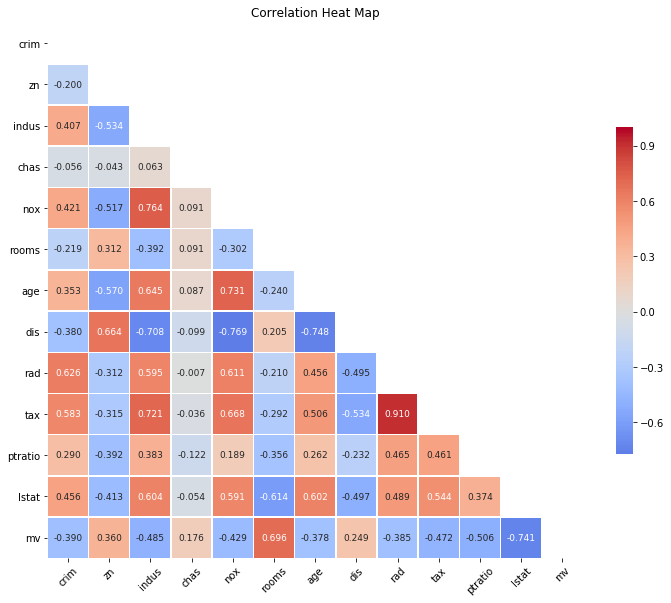

In [9]:
# print(boston_input.corr())

# examine correlations among boston housing data set
# with correlation matrix/heat map
corr_chart(boston)

In [10]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms         age         dis         rad         tax     ptratio       lstat          mv
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   22.528854
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   28.148861    2.105710    8.707259  168.537116    2.164946    7.141062    9.182176
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000    2.900000    1.129600    1.000000  187.000000   12.600000    1.730000    5.000000
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   45.025000    2.100175    4.000000  279.000000   17.400000    

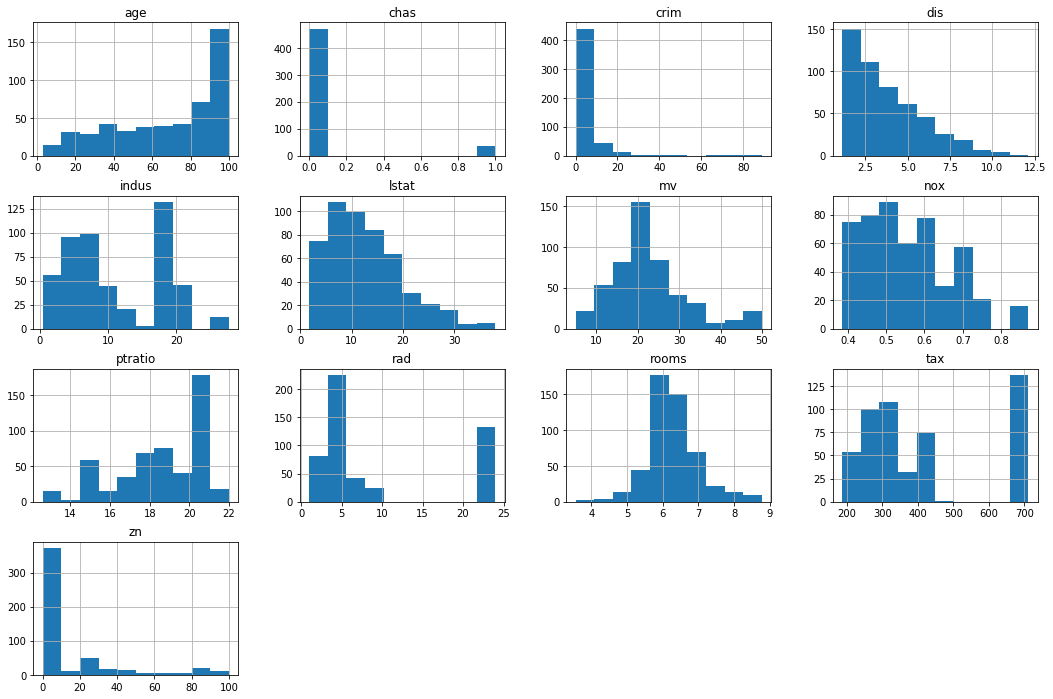

In [11]:
# Check distributions of non-categorical variables for boston housing by histogram
boston.hist(figsize=(18,12))
plt.show('plot-histogram-boston');

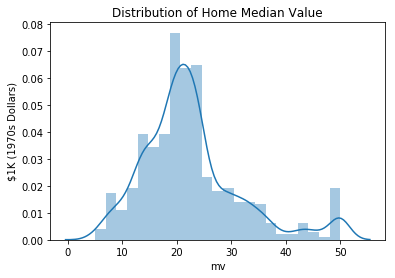

In [12]:
sns.distplot(boston['mv'])
plt.title("Distribution of Home Median Value")
plt.ylabel("$1K (1970s Dollars)")
plt.show();

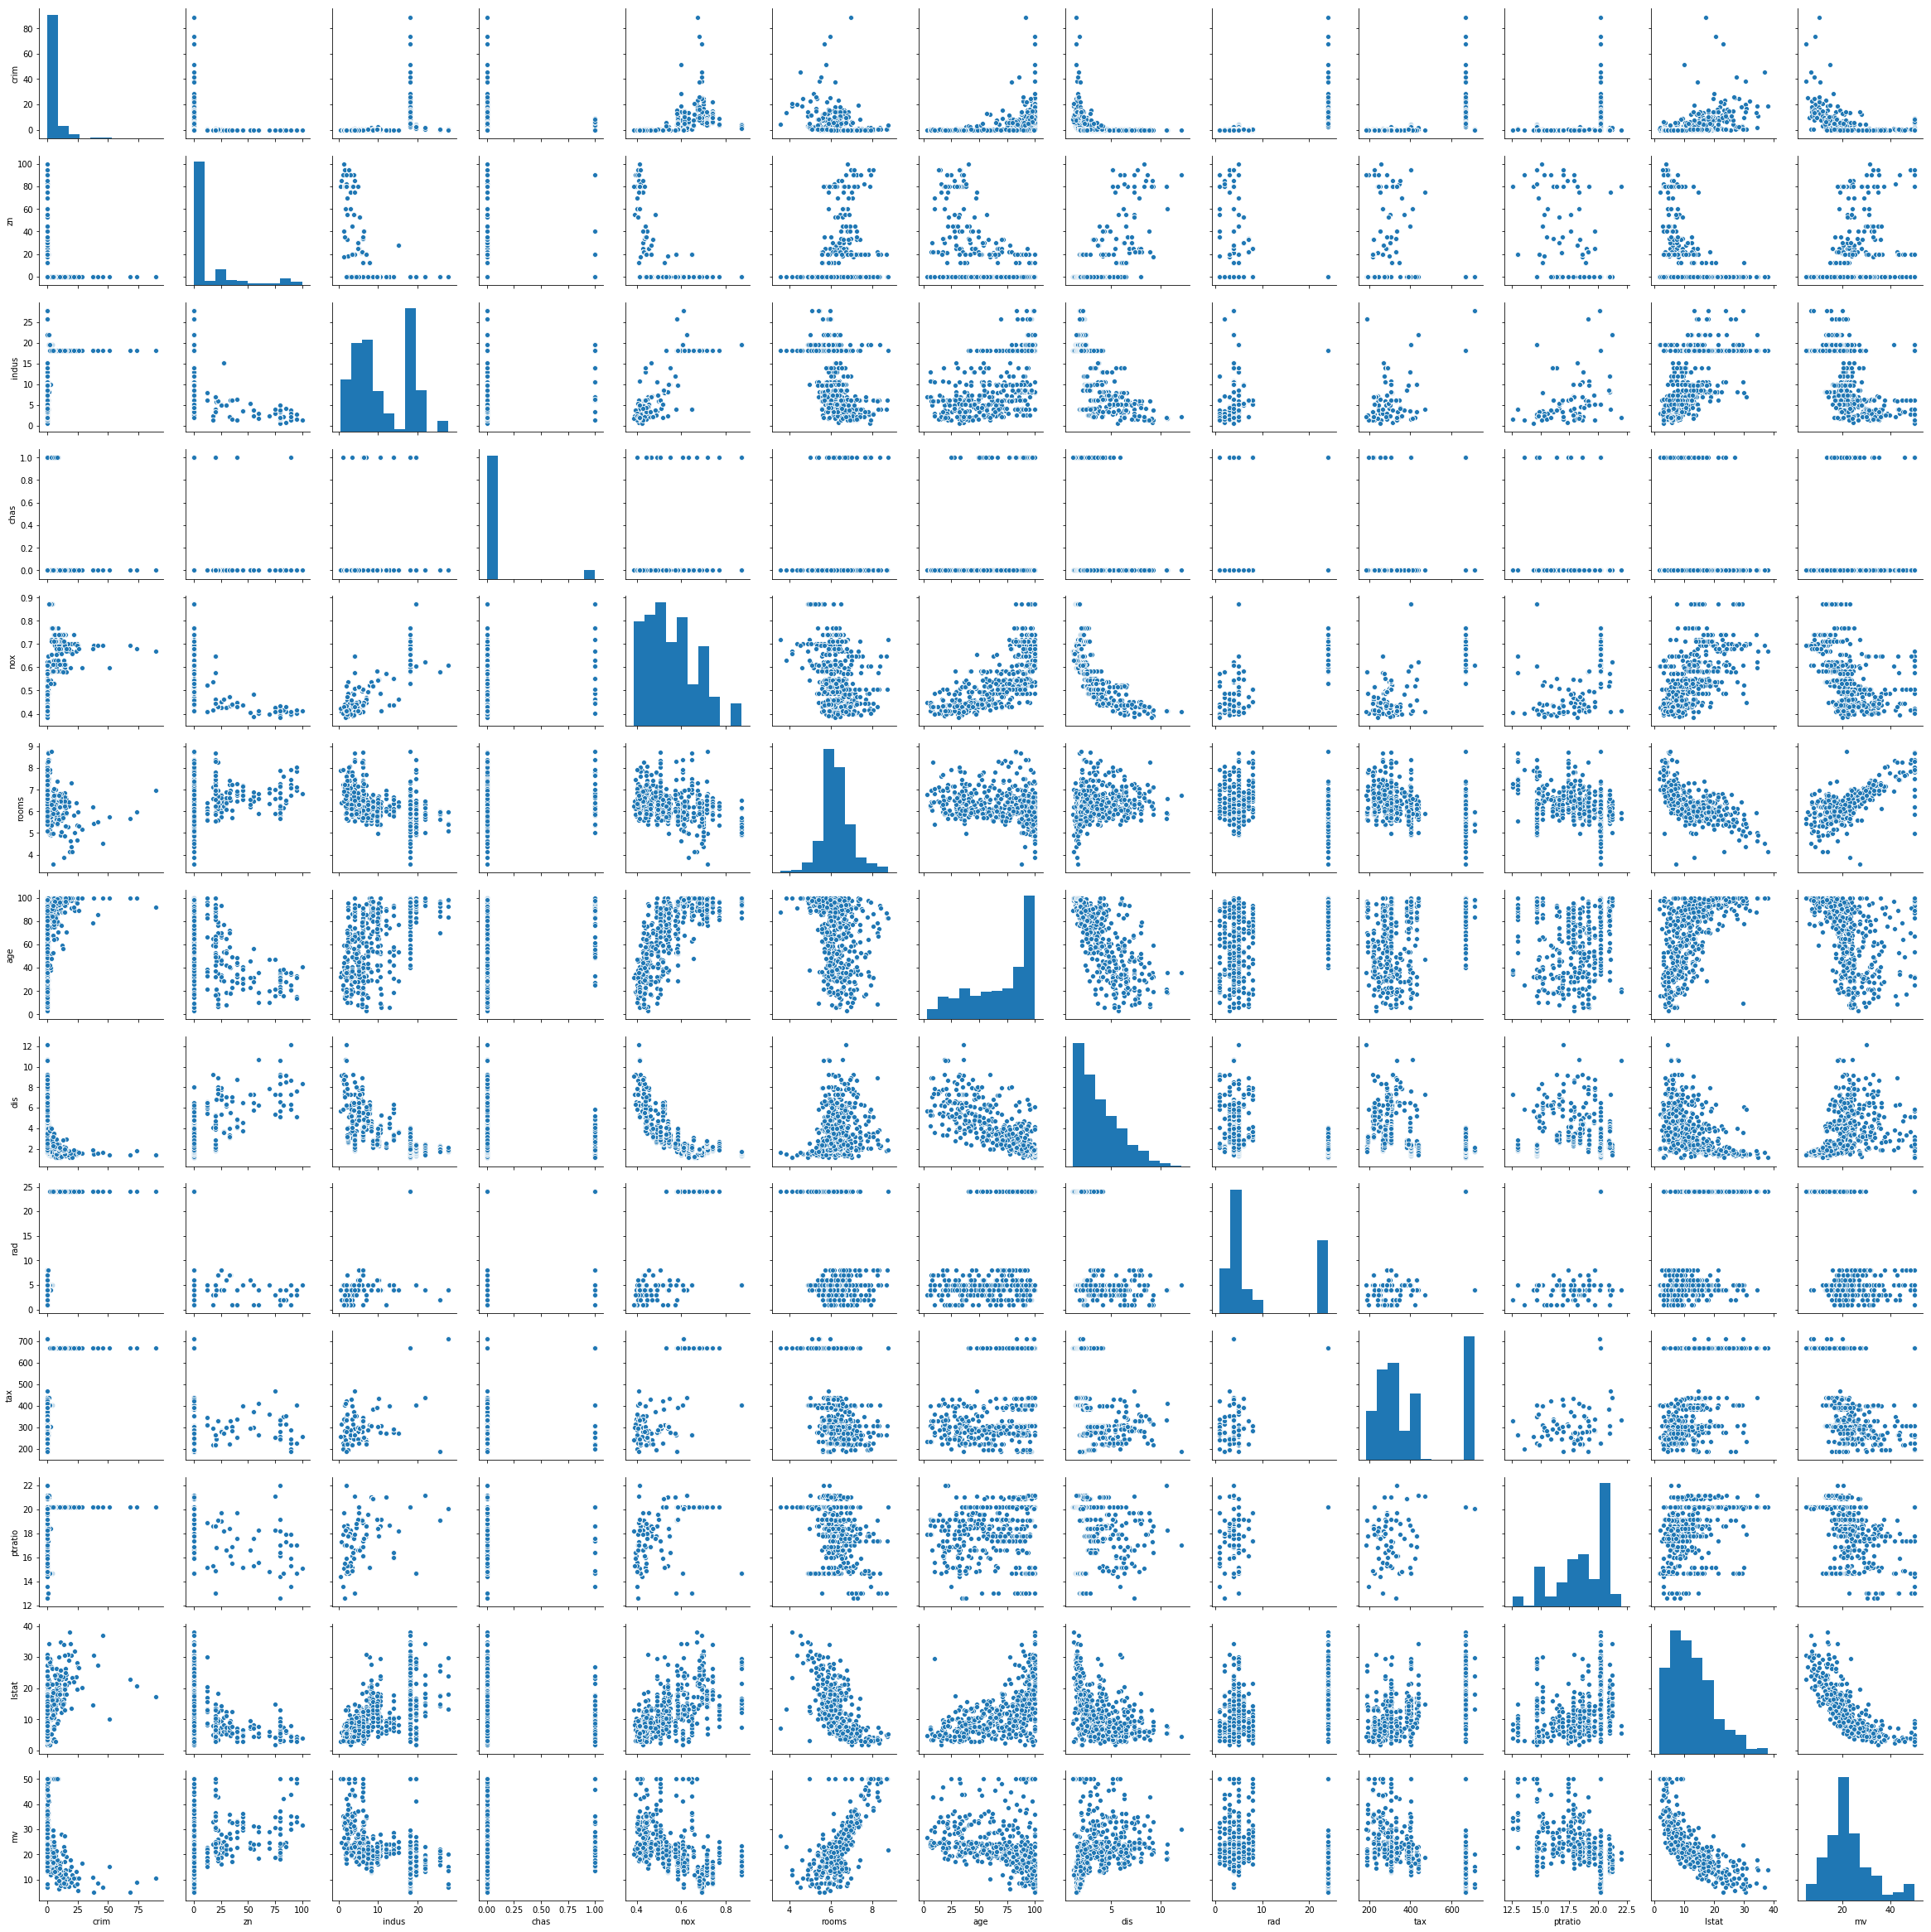

In [13]:
sns.pairplot(boston)
plt.show();

In [14]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [15]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [16]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [17]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

[2.253e+01 3.614e+00 1.136e+01 1.114e+01 6.917e-02 5.547e-01 6.285e+00
 6.857e+01 3.795e+00 9.549e+00 4.082e+02 1.846e+01 1.265e+01]
[9.173e+00 8.593e+00 2.330e+01 6.854e+00 2.537e-01 1.158e-01 7.019e-01
 2.812e+01 2.104e+00 8.699e+00 1.684e+02 2.163e+00 7.134e+00]


In [18]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

In [19]:
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [20]:
# --------------------------------------------------------
# specify the set of regression models being evaluated
# we set normalize=False because we have standardized
# the model input data outside of the modeling method calls
# Note how we are searching across many potential random forest
# models, varying the meta-parmeter associated with the maximum
# number of explanatory variables to include in each tree.

names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 
         'ElasticNet_Regression',       
         'Random_Forest_Regression_SQRT_100', 
         'Random_Forest_Regression_LOG2_100',
         'Random_Forest_Regression_LOG2_200',
#         'Random_Forest_Regression_LOG2_500',
#         'Random_Forest_Regression_LOG2_700',
#         'Random_Forest_Regression_LOG2_800',
        'Random_Forest_Regression_LOG2_1000',
        'GradientBoostingRegressor_1000',
        'GradientBoostingRegressor_200']
         

regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT), 
              Ridge(alpha = 1, solver = 'cholesky', 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    normalize = False, 
                    random_state = RANDOM_SEED),
              Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                         max_iter=10000, tol=0.01, 
                         fit_intercept = SET_FIT_INTERCEPT, 
                         normalize = False, 
                         random_state = RANDOM_SEED),
              RandomForestRegressor(n_estimators = 100, criterion='mse', 
                                  max_features = 'sqrt', bootstrap=True, 
                                  n_jobs = -1, min_impurity_split = 0.01,
                                  random_state = RANDOM_SEED),
              RandomForestRegressor(n_estimators = 100, criterion='mse', 
                                  max_features = 'log2', bootstrap=True, 
                                  n_jobs = -1,min_impurity_split = 0.01,
                                  random_state = RANDOM_SEED), 
              RandomForestRegressor(n_estimators = 200, criterion='mse', 
                                  max_features = 'log2', bootstrap=True, 
                                  n_jobs = -1,min_impurity_split = 0.01,
                                  random_state = RANDOM_SEED),
#              RandomForestRegressor(n_estimators = 500, criterion='mse', 
#                                   max_features = 'log2', bootstrap=True, 
#                                   n_jobs = -1,min_impurity_split = 0.01,
#                                   random_state = RANDOM_SEED),
#              RandomForestRegressor(n_estimators = 700, criterion='mse', 
#                                   max_features = 'log2', bootstrap=True, 
#                                   n_jobs = -1,min_impurity_split = 0.01,
#                                   random_state = RANDOM_SEED),
#              RandomForestRegressor(n_estimators = 800, criterion='mse', 
#                                   max_features = 'log2', bootstrap=True, 
#                                   n_jobs = -1,min_impurity_split = 0.01,
#                                   random_state = RANDOM_SEED),
             RandomForestRegressor(n_estimators = 1000, criterion='mse', 
                                  max_features = 'log2', bootstrap=True, 
                                  n_jobs = -1,min_impurity_split = 0.01,
                                  random_state = RANDOM_SEED),
             GradientBoostingRegressor(n_estimators = 1000, criterion='mse', 
                                  max_features = 'log2',
                                  random_state=RANDOM_SEED),
               GradientBoostingRegressor(n_estimators = 200, criterion='mse', 
                                  max_features = 'log2',
                                  random_state=RANDOM_SEED)]

In [21]:
# RandomForestRegressor default settings used with two exceptions
#     n_estimators = 100, (increase size for more stable estimators)
#     max_features = 'sqrt' (subset of features included in each tree,
#                             with 12 features sqrt(12) = 3.464 -> 3 in each tree)
#     max_features = 'log2' (ln(12)/ln(2) = 2.485/0.693 = 3.585 -> 3 in each tree
#                            given that the algorithm truncates)
#     min_impurity_split = 0.01

In [22]:
warnings.filterwarnings("ignore", category=Warning)
# --------------------------------------------------------
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation, restdata with its 
# small sample size could be analyzed would be a good candidate
# for  leave-one-out cross-validation, which would set the number
# of folds to the number of observations in the data set.
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# check the splitting process by looking at fold observation counts

index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
#         print('Fitted regression intercept:', reg_model.intercept_)
#         print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
print(cv_results_df.mean())   



Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of determination (R-squared): 0.7650752349379009
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.3080338355432656

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)

Coefficient of determination (R-squared): 0.7670378077121718
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.30674447231421376

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.7712646476211942
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.3039489652625287

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.7753975899539927
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.3011904719557345

Regression model evaluation for: Random_Forest_Regression_SQRT_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.6746871456383942
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.36248048905343266

Regression model evaluation for: Random_Forest_Regression_LOG2_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_sta

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.6746871456383942
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.36248048905343266

Regression model evaluation for: Random_Forest_Regression_LOG2_200
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_sta

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.6913779975151932
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.3530591452071951

Regression model evaluation for: Random_Forest_Regression_LOG2_1000
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_st

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.6810973805414796
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.3588914121111186

Regression model evaluation for: GradientBoostingRegressor_1000
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_it

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.8041775925862259
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.28123231102996604

Regression model evaluation for: GradientBoostingRegressor_200
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.7780711978804624
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.2993924591483484

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of determination (R-squared): 0.46067574628462904
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.4148885192245404

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)

Coefficient of determination (R-squared): 0.46579221712274843
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.4129158436126736

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.6520680038258773
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.33323731456183026

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.6489188948360789
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.33474197180286874

Regression model evaluation for: Random_Forest_Regression_SQRT_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.8243784116047312
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.23675294612114814

Regression model evaluation for: Random_Forest_Regression_LOG2_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_sta

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.8243784116047314
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.23675294612114808

Regression model evaluation for: Random_Forest_Regression_LOG2_200
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_sta

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.8183751357238751
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.24076540980271047

Regression model evaluation for: Random_Forest_Regression_LOG2_1000
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_s

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.8022789987639557
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.25120763920451916

Regression model evaluation for: GradientBoostingRegressor_1000
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_i

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.7899892907001839
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.2588970861213106

Regression model evaluation for: GradientBoostingRegressor_200
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_s

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.7777867611792604
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.2663124109427719

Fold index: 2 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of determination (R-squared): -1.31117513765073
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.4389384002541711

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)

Coefficient of determination (R-squared): -1.2803147541226392
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.4359980497370254

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): -0.16418279785875822
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.3115284662303818

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): -0.23403251396154068
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.32073802399581003

Regression model evaluation for: Random_Forest_Regression_SQRT_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.504686401371703
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.20320167043164697

Regression model evaluation for: Random_Forest_Regression_LOG2_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_star

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.504686401371703
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.20320167043164697

Regression model evaluation for: Random_Forest_Regression_LOG2_200
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_star

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.5448418762335288
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.19479073543162304

Regression model evaluation for: Random_Forest_Regression_LOG2_1000
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_s

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.5217722616424103
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.1996661892899206

Regression model evaluation for: GradientBoostingRegressor_1000
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_it

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): -0.5728895932726077
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.36210645565913085

Regression model evaluation for: GradientBoostingRegressor_200
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): -0.3396831054233873
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.3341859508962517

Fold index: 3 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of determination (R-squared): 0.6328856607774367
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.6522437994589771

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)

Coefficient of determination (R-squared): 0.6318124406179929
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.6531964867707817

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.4234577110284604
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.8173816226257143

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.47764365750230775
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.7780235114030633

Regression model evaluation for: Random_Forest_Regression_SQRT_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.6758596187201951
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.6128805717298497

Regression model evaluation for: Random_Forest_Regression_LOG2_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_star

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.6758596187201952
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.6128805717298497

Regression model evaluation for: Random_Forest_Regression_LOG2_200
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_star

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.7126103094897347
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.5770917655969073

Regression model evaluation for: Random_Forest_Regression_LOG2_1000
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_st

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.7145011087313256
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.5751902266941178

Regression model evaluation for: GradientBoostingRegressor_1000
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_it

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.673590512056889
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.6150220297341558

Regression model evaluation for: GradientBoostingRegressor_200
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_sp

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.7016830930776652
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.5879605924784644

Fold index: 4 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of determination (R-squared): 0.5342286831540056
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.6217833818375665

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)

Coefficient of determination (R-squared): 0.5363005637661609
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.6203989076135007

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.5375157042637307
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.619585485908222

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.594960905848789
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.5798307080909457

Regression model evaluation for: Random_Forest_Regression_SQRT_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.7877904593513664
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.41969635084668233

Regression model evaluation for: Random_Forest_Regression_LOG2_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_sta

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.7877904593513665
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.41969635084668233

Regression model evaluation for: Random_Forest_Regression_LOG2_200
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_sta

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.7810022514636608
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.42635618301100103

Regression model evaluation for: Random_Forest_Regression_LOG2_1000
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_s

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.7872492615586812
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.420231185671792

Regression model evaluation for: GradientBoostingRegressor_1000
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_ite

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.819044679509168
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.38755952855140496

Regression model evaluation for: GradientBoostingRegressor_200
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_s

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.8090293828338522
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.3981401872021686

Fold index: 5 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of determination (R-squared): 0.7248910073380552
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.49601152882865296

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)

Coefficient of determination (R-squared): 0.7251740530340207
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.49575630260601533

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.42708462173697925
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.7157883365828116

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.5488571408748044
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.6351794243987483

Regression model evaluation for: Random_Forest_Regression_SQRT_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.7417119583284563
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.48060858843994714

Regression model evaluation for: Random_Forest_Regression_LOG2_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_sta

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.7417119583284563
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.4806085884399472

Regression model evaluation for: Random_Forest_Regression_LOG2_200
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_star

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.7403004467963616
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.4819200317862802

Regression model evaluation for: Random_Forest_Regression_LOG2_1000
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_st

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.7400421630899015
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.4821596185655038

Regression model evaluation for: GradientBoostingRegressor_1000
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_it

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.8120912789721197
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.4099329670165389

Regression model evaluation for: GradientBoostingRegressor_200
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_s

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.7998863646415391
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.4230363812395272

Fold index: 6 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (456, 12)
X_test: (50, 12)
y_train: (456,)
y_test: (50,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of determination (R-squared): 0.3782678938987154
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.343828185197933

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)

Coefficient of determination (R-squared): 0.3867221835947976
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.3414825024396862

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.11908627653335713
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.40926679964096324

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.16279268097613486
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.39898478613605265

Regression model evaluation for: Random_Forest_Regression_SQRT_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.3592555613412445
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.349045666310617

Regression model evaluation for: Random_Forest_Regression_LOG2_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.3592555613412445
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.349045666310617

Regression model evaluation for: Random_Forest_Regression_LOG2_200
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.371457060341269
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.34570630774408556

Regression model evaluation for: Random_Forest_Regression_LOG2_1000
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_st

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.3913185410560752
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.34020043453460297

Regression model evaluation for: GradientBoostingRegressor_1000
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_i

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.201704329636074
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.3896024815822608

Regression model evaluation for: GradientBoostingRegressor_200
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_sp

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.24211067652658103
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.3796144383262872

Fold index: 7 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (456, 12)
X_test: (50, 12)
y_train: (456,)
y_test: (50,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of determination (R-squared): -0.014566207830289724
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 1.34082722477313

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)

Coefficient of determination (R-squared): -0.0128058692310975
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 1.3396635083924238

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.033942779447400206
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 1.3083804564249102

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.012797921367182719
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 1.3226217294160258

Regression model evaluation for: Random_Forest_Regression_SQRT_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.4882980864523422
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.952228429301026

Regression model evaluation for: Random_Forest_Regression_LOG2_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.4882980864523424
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.9522284293010258

Regression model evaluation for: Random_Forest_Regression_LOG2_200
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_star

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.49375503980445823
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.9471373850724261

Regression model evaluation for: Random_Forest_Regression_LOG2_1000
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_s

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.4708394692108847
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.9683365944679141

Regression model evaluation for: GradientBoostingRegressor_1000
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_it

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.4909726485714784
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.9497366165503573

Regression model evaluation for: GradientBoostingRegressor_200
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_s

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.5064678826278965
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.9351694977097157

Fold index: 8 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (456, 12)
X_test: (50, 12)
y_train: (456,)
y_test: (50,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of determination (R-squared): -1.04100084176042
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.6697047890403504

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)

Coefficient of determination (R-squared): -1.0381588329307827
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.6692383585726623

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): -1.5514939180499288
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.7487883544124373

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): -1.2832934497733932
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.708341485728344

Regression model evaluation for: Random_Forest_Regression_SQRT_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.13262148751432956
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.4365823178682654

Regression model evaluation for: Random_Forest_Regression_LOG2_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_sta

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.13262148751432956
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.4365823178682654

Regression model evaluation for: Random_Forest_Regression_LOG2_200
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_sta

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.10807627902385142
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.44271646065320963

Regression model evaluation for: Random_Forest_Regression_LOG2_1000
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.14187278286744875
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.43424782410094115

Regression model evaluation for: GradientBoostingRegressor_1000
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.21590514906205227
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.41509367285453125

Regression model evaluation for: GradientBoostingRegressor_200
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.229495305158541
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.4114806880050852

Fold index: 9 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (456, 12)
X_test: (50, 12)
y_train: (456,)
y_test: (50,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient of determination (R-squared): 0.477957357260997
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.3331377635873666

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='cholesky', tol=0.001)

Coefficient of determination (R-squared): 0.48862051999665856
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.3297178997223888

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.5598113511807492
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.3059076204007171

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.01, warm_start=False)

Coefficient of determination (R-squared): 0.5732958512365804
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.30118567276469327

Regression model evaluation for: Random_Forest_Regression_SQRT_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.4489100177450275
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.3422804816003952

Regression model evaluation for: Random_Forest_Regression_LOG2_100
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_star

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.4489100177450275
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.3422804816003952

Regression model evaluation for: Random_Forest_Regression_LOG2_200
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_star

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.39972690633138674
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.35722785410361013

Regression model evaluation for: Random_Forest_Regression_LOG2_1000
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.01,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Coefficient of determination (R-squared): 0.42366652668926497
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.3500320392583051

Regression model evaluation for: GradientBoostingRegressor_1000
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_i

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.1574073739826859
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.4232331757638523

Regression model evaluation for: GradientBoostingRegressor_200
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_s

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

Coefficient of determination (R-squared): 0.2190907202636102
{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.40744704082866945

----------------------------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method               Root mean-squared error
Linear_Regression                     0.561940
Ridge_Regression                      0.560511
Lasso_Regression                      0.587381
ElasticNet_Regression                 0.568084
Random_Forest_Regression_SQRT_100     0.43957


---------------------------------------------------------------------------
Random Forests Regression Model Explanatory Variable Importance Results
       name                                        description  importance
11    lstat  Percentage of population of lower socio-econom...    0.288336
5     rooms                   Average number of rooms per home    0.263481
4       nox       Air pollution (nitrogen oxide concentration)    0.098845
0      crim                                         Crime rate    0.075325
7       dis            Weighted distance to employment centers    0.058590
2     indus  Percentage of business that is industrial or n...    0.056671
10  ptratio              Pupil/teacher ratio in public schools    0.056313
9       tax                                           Tax rate    0.035697
6       age              Percentage of homes built before 1940    0.027419
8       rad                   Accessibility to radial highways    0.021914
1        zn               

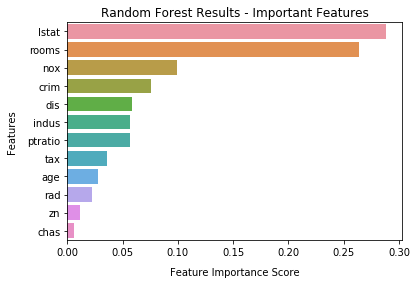

In [23]:
warnings.filterwarnings("ignore", category=Warning)
# ----------------------------------------------------------
# Random forests is the best model of those examined
# In particular, we see that having a maximum of 7
# explanatory variables in each tree is best for this study.

# refit using Random Forest with best parameters 
rf = RandomForestRegressor(n_estimators = 200, criterion='mse', 
                                  max_features = 'log2', bootstrap=True, 
                                  n_jobs = -1,min_impurity_split = 0.01,
                                  random_state = RANDOM_SEED)

rf.fit(X_train, y_train)
print('\n---------------------------------------------------------------------------')
print('Random Forests Regression Model Explanatory Variable Importance Results')
var_name = [    
    'crim',
    'zn',
    'indus',
    'chas',
    'nox',
    'rooms',
    'age',
    'dis',
    'rad',
    'tax',
    'ptratio',
    'lstat']
var_description = [  
    'Crime rate',
    'Percentage of land zoned for lots',
    'Percentage of business that is industrial or nonretail',
    'On the Charles River (1) or not (0)',
    'Air pollution (nitrogen oxide concentration)',
    'Average number of rooms per home',
    'Percentage of homes built before 1940',
    'Weighted distance to employment centers',
    'Accessibility to radial highways',
    'Tax rate',
    'Pupil/teacher ratio in public schools',
    'Percentage of population of lower socio-economic status']
var_importance = rf.feature_importances_
final_model_results = pd.DataFrame({'name': var_name,
                                    'description': var_description,
                                    'importance': var_importance})
final_model_results=final_model_results.sort_values(by=['importance'],ascending=False)    
print(final_model_results) 
print('\n---------------------------------------------------------------------------')
# Plot Feature Importance 
%matplotlib inline
# Creating a bar plot
sns.barplot(x=final_model_results.importance,y=final_model_results.name)
plt.xlabel('Feature Importance Score',labelpad=10)
plt.ylabel('Features',labelpad=10)
plt.title("Random Forest Results - Important Features");

#### Boston_Housing_Study
#### REPORT/FINDINGS: 

(1) A summary and problem definition for management; 

The real estate brokerage firm wants to use  machine learning to complement conventional methods for assessing the market value of residential real estate. So they'd like to know which modeling method to use, in other words, which one performs best at predicting real estate values.  

---
(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed; 

This assignment involved fitting regression models to data from the Boston Housing Study. We used all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study. The response variable was the median value of homes in thousands of 1970 dollars. Initially, four regression modeling methods were employed: linear regression, ridge regression, lasso regression, and elastic net. We later added Random Forest Regression and Gradient Boosting Regression. These methods were evaluated within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error.

---
(3) Overview of programming work; 

The Boston Housing data was read into python and we looked at the structure of the data, namely data types and counts for each variable and verified there was no missing data. We only used the numeric variables, and the variable 'neighborhood' was dropped from the dataset. We looked at the distribution of non-categorical variables in histograms. We examined correlations among variables in the dataset through a correlation matrix and scatterplots. We also reviewed descriptive statistics for the variables. In preparation for the machine learning steps, we transformed the data into an array, and ran it through StandardScaler. Next we selected 6 modeling methods for evaluation, and set up the k-fold cross-validation design for the response variable, median value. We iterated through the models, and looked at the mean RMSE for each model, paying close attention to the different variations of Random Forest Regression and Gradient Boosting Regression. 

---
(4) Review of results with recommendations for management.

The initial data exploration revealed that the tax rate and accessibility to radial highways are highly correlated (0.91), air pollution (nitrogen oxide concentration) and percent of business that is industrial or nonretail had a correlation of 0.764, and percentage of homes built before 1940 and air pollution were also highly correlated (0.731). This makes sense since nowadays people are more aware of environmental and health issues, and less likely to want to live close to a heavily indstustrial area, and this is something companies consider before beginning a housing development project. The respone variable, median value of homes in thousands of 1970 dollars, was positively correlated with average number of rooms per home (0.695), and very negatively correlated with percentage of population of lower socio-economic status. This also makes sense since larger homes with more rooms will have a higher value; and people with a higher socioeconomic status are more likely to buy higher value houses than those with a lower socioeconomic status. Both of these variables, lstat and rooms, were also the top two most important variables as indicated in the feature importance score generated by the random forest regression. 

The most common performance measure of a regression model is the Root Mean Square Error (RMSE), which was used to evaluate the models. Interestingly, the Random Forest and Gradient Boosting models had an RMSE of between 0.43-0.44, which was a clear advantage over the Linear, Ridge, Lasso, and ElasticNet models, which had RMSE's between 0.56-0.58. We previously recommended Linear Regression to management, but based on our current results, we need to change our recommendation to one of the ensemble methods, either Random Forest Regression or Gradient Boosting Regression. We used different parameters in each of the random forest and gradient boosting models, and although the RMSE's were very close, we would recommend the random forest regression using the following parameters: n_estimators = 200, max_features = 'log2', bootstrap=True. However, since we only had a general idea of which parameters to use, for the future, it would be helpful to systematically tune the parameters. This can be done using sklearn's Random Hyperparameter Grid (RandomizedSearchCV) as well as Grid Search with Cross Validation (GridSearchCV). We should also remind management that random forests are black box models, and with our improved prediction, we do lose some interpretability of the model. However, since the main goal of this study is to PREDICT and not explain, our final recommendation will remain random forest regression.  
